* NAME: Rishabh Patil
* SAP: 60009200056
* BATCH: D12

#**Lab 1**

#**Task 1: Perform Spam Classification with Text Preprocessing Steps**

In [ ]:
import re
import os
import nltk
import math
import nltk.corpus
import numpy as np
import string as st
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.naive_bayes import MultinomialNB
from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [ ]:
path = "/content/SMSSpamCollection"
data = open(path)
l1, l2 = zip(*[x.split('\t') for x in data.readlines()])

In [ ]:
data = {'label': l1, 'data': l2}
df = pd.DataFrame(data)
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
nltk.download('all')

**Converting to Lower Case**

In [ ]:
sentence = df.iloc[0]['data']
sentence = sentence.lower()
lower = []
lower.append(sentence)
print(lower)

**Removing Numbers**

In [ ]:
def remove_numbers(text):
  result = re.sub(r'\d+', '', text)
  return result

In [ ]:
removed = []
for i in df['data']:
  removed.append(remove_numbers(i))
print(removed)

**Removing Punctuations**

In [ ]:
def remove_punctuation(text):
  translator = str.maketrans('', '', st.punctuation)
  return text.translate(translator)

In [ ]:
removed_punctuations = []
for i in df['data']:
  removed_punctuations.append(remove_numbers(i))
print(removed_punctuations)

**Removing Whitespaces**

In [ ]:
def remove_whitespace(text):
  return " ".join(text.split())

In [ ]:
removed_whitespaces = []
for i in df['data']:
  removed_whitespaces.append(remove_numbers(i))
print(removed_whitespaces)

**Removing Stopwords**

In [ ]:
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word not in stop_words]
  return filtered_text

In [ ]:
removed_stopwords = []
for i in df['data']:
  removed_stopwords.append(remove_numbers(i))
print(removed_stopwords)

In [ ]:
nltk.download('punkt')

**Tokenization**

In [ ]:
tokenizer = []
for word in df['data']:
  tokenized = word_tokenize(word)
  tokenizer.append(tokenized)
print(tokenizer)

**Stemming & Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_word(text):
  word_tokens = word_tokenize(text)
  lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
  return lemmas

In [ ]:
removed_lemmatize = []
for i in df['data']:
  removed_lemmatize.append(remove_numbers(i))
print(removed_lemmatize)

In [ ]:
stem = []
stemmer = PorterStemmer()
for i in df['data']:
  stem.append(stemmer.stem(i))
print(stem)

**Feature Extraction**

In [ ]:
!pip install sklearn

**TD-IDF Vectorizer**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['data'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
print(tfidf_df)

       00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
...   ...  ...     ...           ...   ...   ...          ...          ...   
5569  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5570  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5571  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5572  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5573  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

      0125698789   02  ...  zhong  zindgi  zoe  zogtorius  zoom

**Training the Naive Bayes Classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['label'], test_size=0.2, random_state=42)

**Count Vectorizer**

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

**Evaluating the performance of MultinomialNB**

MultinomialNB considers a feature vector where a given term represents the number of times it appears i.e. frequency.

It offers more accuracy for data which needs to be represented in the form of 'count of words'.

**Evaluation Metrics and Classification Report**

In [ ]:
y_pred = classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred, pos_label='spam')
rec = recall_score(y_test,y_pred, pos_label='spam')
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print('Precision (Spam): ' ,prec)
print('Recall (Spam): ' ,rec)
print("Classification Report:\n", classification_rep)

Accuracy: 0.99
Precision (Spam):  0.967741935483871
Recall (Spam):  0.9316770186335404
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       954
        spam       0.97      0.93      0.95       161

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
confusion_matrix

Confusion Matrix: 


array([[949,   5],
       [ 11, 150]])

#**Task 2: Perform Spam Classification without Text Preprocessing Steps**

In [ ]:
path = "/content/SMSSpamCollection"
data = open(path)
l1, l2 = zip(*[x.split('\t') for x in data.readlines()])

In [ ]:
data = {'label': l1, 'data': l2}
df = pd.DataFrame(data)
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['data']
Y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.70, random_state=42)

In [ ]:
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
X_new_counts = count_vector.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

In [ ]:
classification_rep = classification_report(y_test, predicted)
np_acc = accuracy_score(y_test,predicted)
np_prec = precision_score(y_test,predicted, pos_label='spam')
np_rec = recall_score(y_test,predicted, pos_label='spam')

In [ ]:
print(f"Accuracy: {np_acc:.2f}")
print('Precision (Spam): ' ,np_prec)
print('Recall (Spam): ' ,np_rec)
print('Classification Report: \n', classification_rep)

Accuracy: 0.94
Precision (Spam):  1.0
Recall (Spam):  0.551923076923077
Classification Report: 
               precision    recall  f1-score   support

         ham       0.94      1.00      0.97      3382
        spam       1.00      0.55      0.71       520

    accuracy                           0.94      3902
   macro avg       0.97      0.78      0.84      3902
weighted avg       0.94      0.94      0.93      3902



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
confusion_matrix

array([[3382,    0],
       [ 233,  287]])

#**Task 3: Comparing Performances of Naive Bayes on Preprocessed and Unprocessed Data**

In [ ]:
comp_metrics = ['Accuracy','Precision','Recall']
not_proc = [np_acc,np_prec,np_rec]
procd = [accuracy,prec,rec]

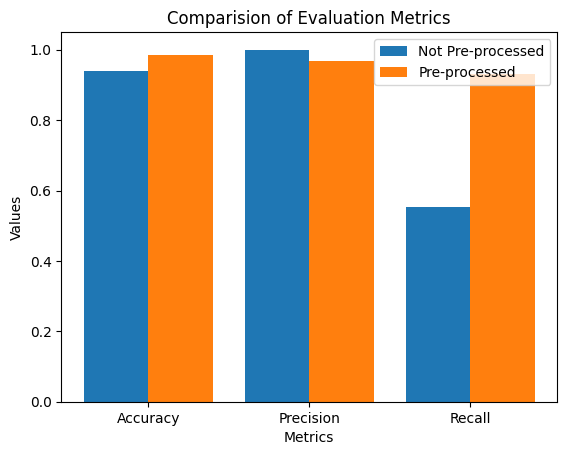

In [ ]:
X_axis = np.arange(3)

plt.bar(X_axis - 0.2, not_proc, 0.4, label = 'Not Pre-processed')
plt.bar(X_axis + 0.2, procd, 0.4, label = 'Pre-processed')
plt.xticks(X_axis, comp_metrics)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparision of Evaluation Metrics")
plt.legend()
plt.show()

**Observations:**

**1. Preprocessed data results in better Accuracy and Recall as compared to Un-preprocessed data.**

**2. Precision is higher in Un-preprocessed data as compared to Preprocessed data.**

In [ ]:
!jupyter nbconvert --to html "/content/60009200040_ACL_D11_Lab1.ipynb"

[NbConvertApp] Converting notebook /content/60009200040_ACL_D11_Lab1.ipynb to html
[NbConvertApp] Writing 688716 bytes to /content/60009200040_ACL_D11_Lab1.html
